In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# load longely dataset into a pandas data frame - first column (year) used as row labels
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv',
                index_col=0)

df.head()


,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [20]:
y = df.Employed # response
X = df.GNP # predictor
X = sm.add_constant(X) # Adds a constant term to the predictor
X.head()

,const,GNP
1947,1,234.289
1948,1,259.426
1949,1,258.054
1950,1,284.599
1951,1,328.975


In [21]:
est = sm.OLS(y, X)

In [22]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 24 Sep 2015   Prob (F-statistic):           8.36e-12
Time:                        16:46:34   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000        50.382    53.305
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
est.params

const    51.843590
GNP       0.034752
dtype: float64

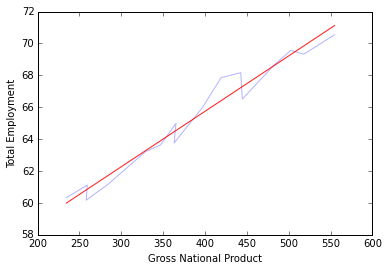

In [27]:
# We pick 100 points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime) # add constant as we did before

#Now we calculate predicted value
y_hat = est.predict(X_prime)

plt.plot(X.GNP, y, alpha=0.3)
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha = 0.9) # Add the regression line, colored red

In [29]:
# statsmodels aso provides a formulaic interface. The arguement
# formula allows you to specify the response and the predictors
# using the column names of the input data fram data.

# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 24 Sep 2015   Prob (F-statistic):           8.36e-12
Time:                        16:51:11   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000        50.382    53.305
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

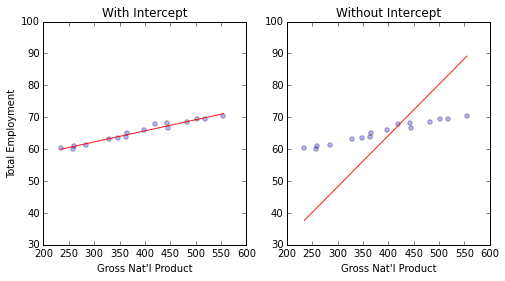

In [32]:
# If you don't want a constant term in your mode, exclude it using the minus operator

est_no_int = smf.ols(formula='Employed ~ GNP -1', data=df).fit()

# We pick 100 points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1) # add constant as we did before 

y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)

fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)

splt.scatter(X.GNP, y, alpha=0.3) # plot the raw data
plt.ylim(30, 100) # set the y axis to be the same
plt.xlabel("Gross Nat'l Product")
plt.ylabel("Total Employment")
plt.title("With Intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9) # add the regression line

splt = plt.subplot(122)
splt.scatter(X.GNP, y, alpha=0.3) # plot the raw data
#plt.ylim(30, 100) # set the y axis to be the same
plt.xlabel("Gross Nat'l Product")
#plt.ylabel("Total Employment")
plt.title("Without Intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9) # add the regression line
